Make Figure 2 for OConnor et al., 2024
3 Subplots with thermocline depths at shelf break, TCD at PITT, and CDW volume on the shelf?

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
import itertools
from Datasets import wind_order_forcings, warm_order_forcings,\
exp_set_dict_wind_order, exp_set_dict_warm_order,\
colors_dict
import Functions_data_analysis as fda
import Functions_plotting as fp
from matplotlib.ticker import ScalarFormatter

In [10]:
wind_order_forcings

[2015, 1991, 1982, 1994, 1992, 1984, 2009, 2003, 1989, 2011]

In [3]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [4]:
# set up data retrieval params
sets = ['ic_1995','ic_2001','ic_2008']
tc_temp = 0.5

# set up plotting params
forcing_labs = [str(f)+'_x5' for f in warm_order_forcings]

In [5]:
# get shelf break tcd for subplot 2
loc1 = 'COT'

p1_data = [] #list of length n_sets. each item contains data for each ic_set
for set_name in sets:
    set_tcd = np.load('Saved Arrays/tcd_'+str(tc_temp)+'deg_tseries_'+loc1+'_'+set_name+'.npy')
    p1_data.append(set_tcd)

In [6]:
# get PITT tcd for subplot 2
loc2 = 'PITT'

p2_data = [] #list of length n_sets. each item contains data for each ic_set
for set_name in sets:
    set_tcd = np.load('Saved Arrays/tcd_'+str(tc_temp)+'deg_tseries_'+loc2+'_'+set_name+'.npy')
    p2_data.append(set_tcd)

In [7]:
# get total shelf CDW volume for subplot 3
loc3 = 'naughten_shelf_box'

# these data are saved by run, not set
runs_nested = [exp_set_dict_wind_order[set] for set in sets]
p3_data = [] #list of length n_sets. each item contains data for each ic_set
for set_i in range(len(runs_nested)):
    set_runs = runs_nested[set_i]
    set_vols = []
    for run_name in set_runs:
        run_vol = np.load('Saved Arrays/CDW_Volume/'+run_name+'_'+str(tc_temp)+'deg_'+loc3+'.npy')
        set_vols.append(run_vol)
    p3_data.append(set_vols)

saved fig!


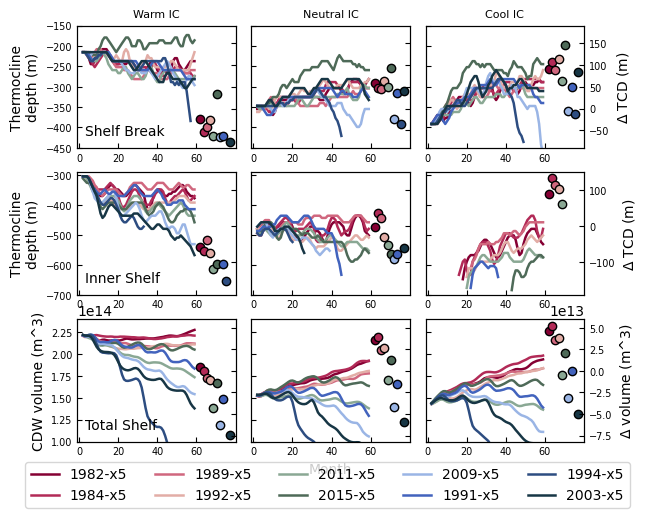

In [11]:
# Plot all exp set data for all 3 locations

plot_data = [p1_data,p2_data,p3_data]
lims = [[-450,-150],[-700,-290],[1e14,2.4e14]]
ic_labs = ['Warm IC','Neutral IC','Cool IC']
titles = ['Shelf Break','Inner Shelf','Total Shelf']
left_labs = ['Thermocline\ndepth (m)','Thermocline\ndepth (m)','CDW volume (m^3)']
right_labs = ['TCD (m)','TCD (m)','volume (m^3)']
months = np.arange(0,60,1) #label x axis months as 0 to 60
change_x_vals = np.linspace(62,77,10) #create arbitrary x vals for plotting 5-yr changes
change_lims = [[-90,190],[-190,150],[-0.82e14,0.6e14]]

colors_dict =  {'1982_x5':"#850033",
                '1984_x5':"#b22a57",
                '1989_x5':"#d0677e",
                '1992_x5':"#e2ada6",
                '2011_x5':"#8AA894",
                '2015_x5':"#4E6A58",
                '2009_x5':"#9ab5e5",
                '1991_x5':"#4263bd",
                '1994_x5':"#2d4d81",
                '2003_x5':"#173645"}
exp_plot_order = list(colors_dict.keys())

fig = plt.figure()
fig.set_size_inches((6.5,5.2))
plot_ct = 1
change_vals = []
axes = []

# Plot each row (each loc)
for row_i in range(3):

    #get location data
    row_data = plot_data[row_i]
    
    # Plot each set in a new subplot
    for set_j in range(3):
        
        ax0 = fig.add_subplot(3,3,plot_ct)
        ax1 = ax0.twinx()
        axes.append(ax0)
        axes.append(ax1)
        set_data = row_data[set_j]
        change_vals.append(sets[set_j])
        
        if set_j == 0:
            ax0.annotate(titles[row_i],(.05,0.1),xycoords = ('axes fraction'))
        if row_i == 0:
            plt.title(ic_labs[set_j],fontsize=8)
        
        # Plot 10 experiments in each set
        for k in range(10):
            
            #get forcing name
            forc_k = exp_plot_order[k] #'YYYY-x5'
            # get index of experiment in wind-ordered tcds
            tcd_idx = wind_order_forcings.index(int(forc_k[0:4])) #int for list of int years)
            
            # Calc 3-month running mean to smooth out tseries
            # print(row_data[tcd_idx])
            data_rm = pd.Series(set_data[tcd_idx]).rolling(window=3).mean()
            ax0.plot(months, data_rm, label=forc_k.replace('_','-'), 
                    color = colors_dict[forc_k],linewidth=1.8)
    
            # Plot change in value (5th yr mean minus 1st year mean)
            # Calculate change after 5 years on right axis of subplot using first and last 6 months
            yr1_mean = np.mean(data_rm[0:6])
            yr5_mean = np.mean(data_rm[-6:])
            change = yr5_mean - yr1_mean
            # if nans in change calculation, remove nans (but only if there is at least 20 values left)
            if np.isnan(change):
                no_nan_data = [value for value in data_rm if not math.isnan(value)]
                if len(no_nan_data) > 20:
                    yr1_mean = np.mean(no_nan_data[0:6])
                    yr5_mean = np.mean(no_nan_data[-6:])
                    change = yr5_mean - yr1_mean
            change_vals.append(change)
            ax1.scatter(change_x_vals[k],change,marker='o',color=colors_dict[forc_k],edgecolor='k')
            
            
        # adjust plot params
        ax0.set_ylim(lims[row_i])
        ax0.set_xlim([-1,80])
        ax0.set_xticks([0,20,40,60])
        ax1.set_ylim(change_lims[row_i])
        ax0.tick_params(axis='both', direction='in', which='both')
        ax1.tick_params(axis='both', direction='in', which='both')
    
        if plot_ct == 8:
             ax0.set_xlabel('Month')
        
        if set_j == 0:
            ax0.set_ylabel(left_labs[row_i])
        else:
            ax0.set_yticklabels([])
        if set_j == 2:
            ax1.set_ylabel(r'$\Delta$ '+right_labs[row_i])
        else:
            ax1.set_yticklabels([])
        plot_ct += 1
        
for ax in axes:
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
        
        
        
    
    
# Adding legend only for the first 10 labels
handles, labels = ax0.get_legend_handles_labels()
legend = plt.legend(handles[:10], labels[:10], loc='lower center', bbox_to_anchor=(-0.62, -0.6), ncol=5)

plt.subplots_adjust(top=0.95,bottom=0.15,hspace=0.2,wspace=.1,left=0.12,right=.9)
# plt.savefig('Plots/Figure_Sx_TCD_all_exps.png',dpi=400)
# print('saved fig!')

saved as Plots/Figure_2ab_TCD_timeseries_ic_2001.png


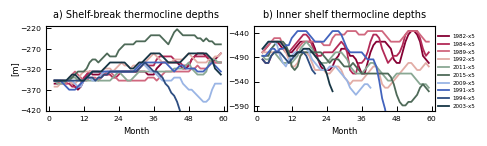

In [15]:
##### Plot just one set of experiments (3 rows)

save = True
#Select experiment set below
set = 'ic_2001'
# Select plotted names of locations
loc_labels = ['Shelf break','Inner Shelf']
fs = 8


# Get data for specified experiment set
j = sets.index(set)
plot_data = [p1_data[j],p2_data[j]]
exp_plot_order = list(colors_dict.keys())
# define left y lims for each exp set 
# (list of 3 lists for 3 experiment sets; each list contins lims for subplots)
lims = [[[-400,-160],[-600,-290]],
        [[-410,-215],[-600,-425]]]
titles = ['a) Shelf-break thermocline depths',
          'b) Inner shelf thermocline depths']
left_labs = ['[m]','[m]',r'[$\mathrm{m}^3$]']
months = np.arange(0,60,1) #label x axis months as 0 to 60


fig,axes = plt.subplots(1,2)
fig.set_size_inches((4.8,1.3))

# Plot each row (each location)
for i in range(2):

    # get data for given location
    row_data = plot_data[i] #list of len 10

    ax = axes[i]
    ax.set_ylim(lims[j][i])
    ax.set_title(titles[i],fontsize=fs-1)
        
    # Plot 10 experiments in each set, from warmest inner shelf TCD to coolest
    for k in range(10):
        
        #get forcing name
        forc_k = exp_plot_order[k]
        # get index of experiment in wind-ordered tcds
        tcd_idx = wind_order_forcings.index(int(forc_k[0:4]))
        
        # Calc 3-month running mean to smooth out tseries
        data_rm = pd.Series(row_data[tcd_idx]).rolling(window=3).mean()
        ax.plot(months, data_rm, label=forc_k.replace('_','-'), 
                color = colors_dict[forc_k],linewidth=1.3)
        
# adjust plot params
for ax in axes:
    ax.set_xlim([-1,61])
    ax.set_xticks([0,12,24,36,48,60])
    ax.tick_params(axis='both', direction='in', which='both')
    ax.set_xlabel('Month',fontsize=fs-2)
    ax.tick_params(axis='x', labelsize=fs-2.5)
    ax.tick_params(axis='y', labelsize=fs-2.5)
    
axes[0].set_yticks(np.arange(-420,-170,50))
axes[0].set_ylabel(left_labs[i],labelpad=0.7,fontsize=fs-2)
axes[1].set_yticks(np.arange(-590,-430,50))
plt.rc('xtick.major', width=0.7)  
plt.rc('ytick.major', width=0.7)  


# Adding legend only for the first 10 labels
handles, labels = ax.get_legend_handles_labels()
legend = axes[-1].legend(handles[:10], labels[:10], loc='lower right',
                         fontsize=fs-4,bbox_to_anchor=(1.25,-0.038), ncol=1,
                         columnspacing=0.9,handletextpad=0.5,frameon=False)

plt.subplots_adjust(top=0.86,bottom=0.21,hspace=0.01,wspace=.15,left=0.09,right=.9)

if save:
    save_name = 'Plots/Figure_2ab_TCD_timeseries_'+set+'.png'
    plt.savefig(save_name,dpi=700)
    print('saved as',save_name)